In [3]:
library(pastecs)
library(ggpubr)

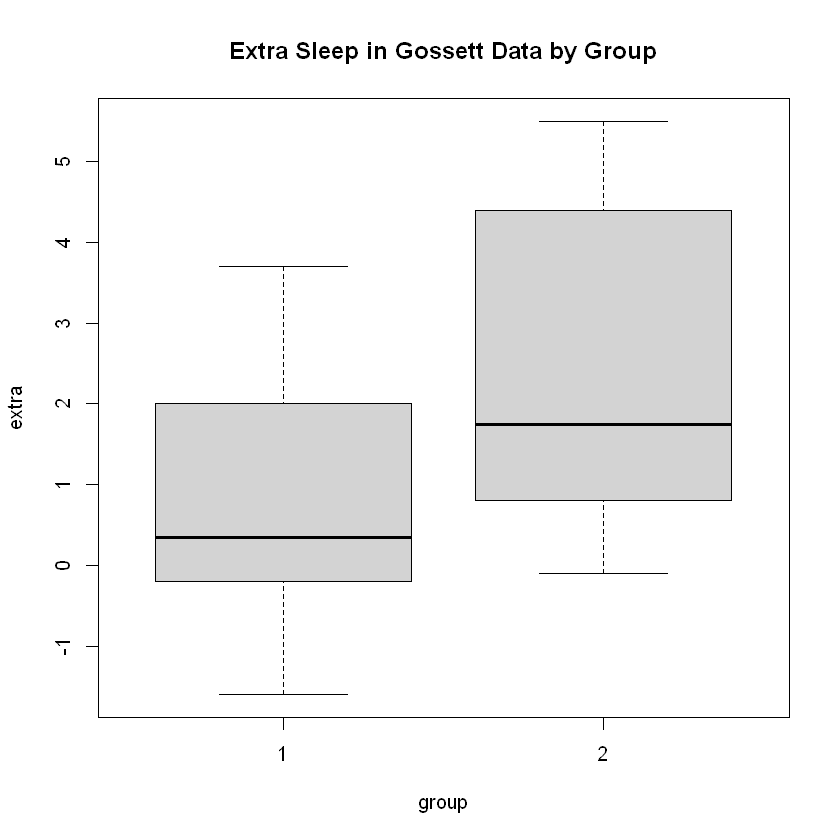

In [5]:
data(sleep)
plot(extra~group, data=sleep, main='Extra Sleep in Gossett Data by Group')

In [6]:
attach(sleep)

In [9]:
# Is there a difference in the average response to each of the two drugs?
extra.1 = extra[group==1]
extra.2 = extra[group==2]
t.test(extra.1, extra.2, paired=TRUE, alternative='two.sided')


	Paired t-test

data:  extra.1 and extra.2
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean of the differences 
                  -1.58 


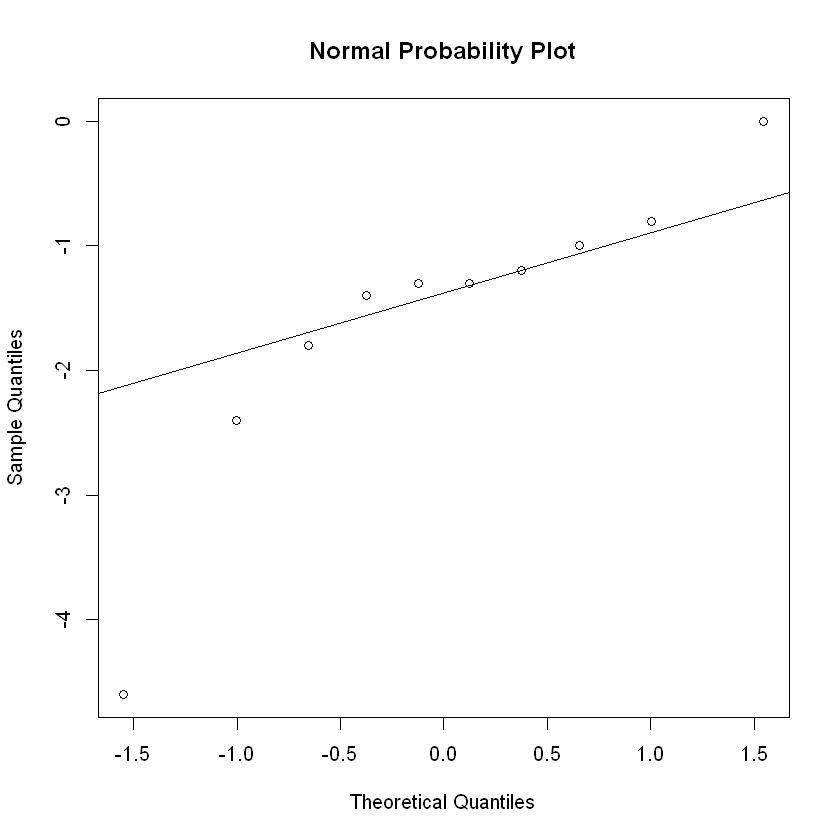

In [10]:
diffs = extra.1-extra.2
qqnorm(diffs, main='Normal Probability Plot')
qqline(diffs)

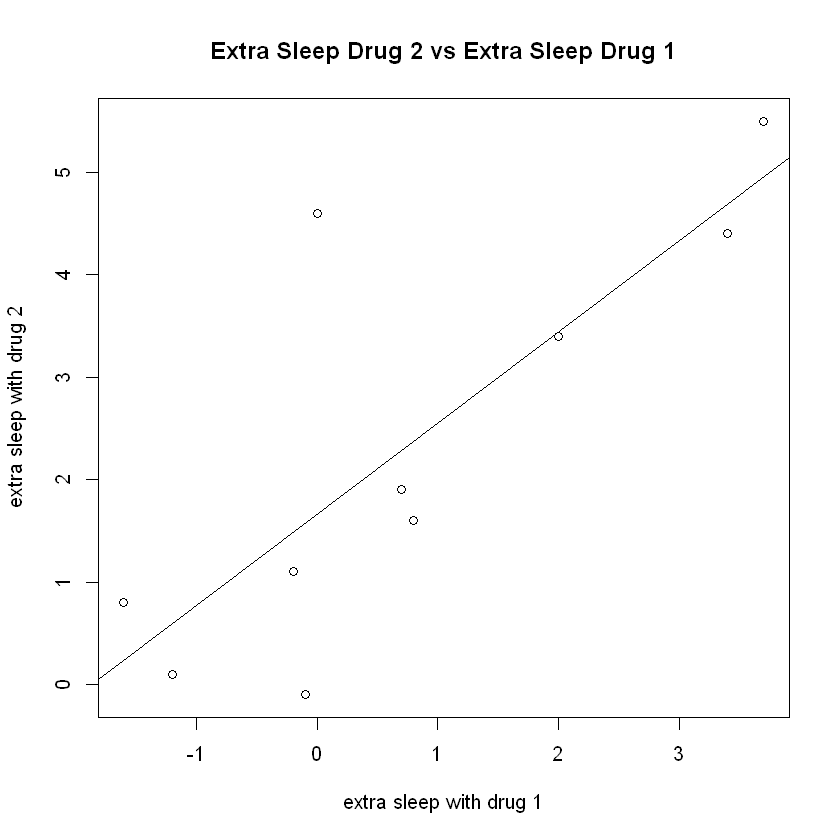

In [14]:
plot(extra.2~extra.1, xlab='extra sleep with drug 1', ylab='extra sleep with drug 2',
    main='Extra Sleep Drug 2 vs Extra Sleep Drug 1')
sleep.linear.model = lm(extra.2 ~ extra.1)
abline(sleep.linear.model)

In [17]:
summary(sleep.linear.model)


Call:
lm(formula = extra.2 ~ extra.1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6735 -0.4673 -0.3365  0.3979  2.9375 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   1.6625     0.4452   3.734  0.00575 **
extra.1       0.8899     0.2399   3.709  0.00596 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.288 on 8 degrees of freedom
Multiple R-squared:  0.6323,	Adjusted R-squared:  0.5863 
F-statistic: 13.76 on 1 and 8 DF,  p-value: 0.005965


In [4]:
# Loading the 'trees' dataset and getting basic stats:
# mean, median, 25th and 75th quartiles, min, max
data(trees)
trees <- trees[complete.cases(trees), ]  # or, na.omit(df)
summary(trees)  # stat.desc(trees) Will provide a detailed list of statistical properties

     Girth           Height       Volume     
 Min.   : 8.30   Min.   :63   Min.   :10.20  
 1st Qu.:11.05   1st Qu.:72   1st Qu.:19.40  
 Median :12.90   Median :76   Median :24.20  
 Mean   :13.25   Mean   :76   Mean   :30.17  
 3rd Qu.:15.25   3rd Qu.:80   3rd Qu.:37.30  
 Max.   :20.60   Max.   :87   Max.   :77.00  

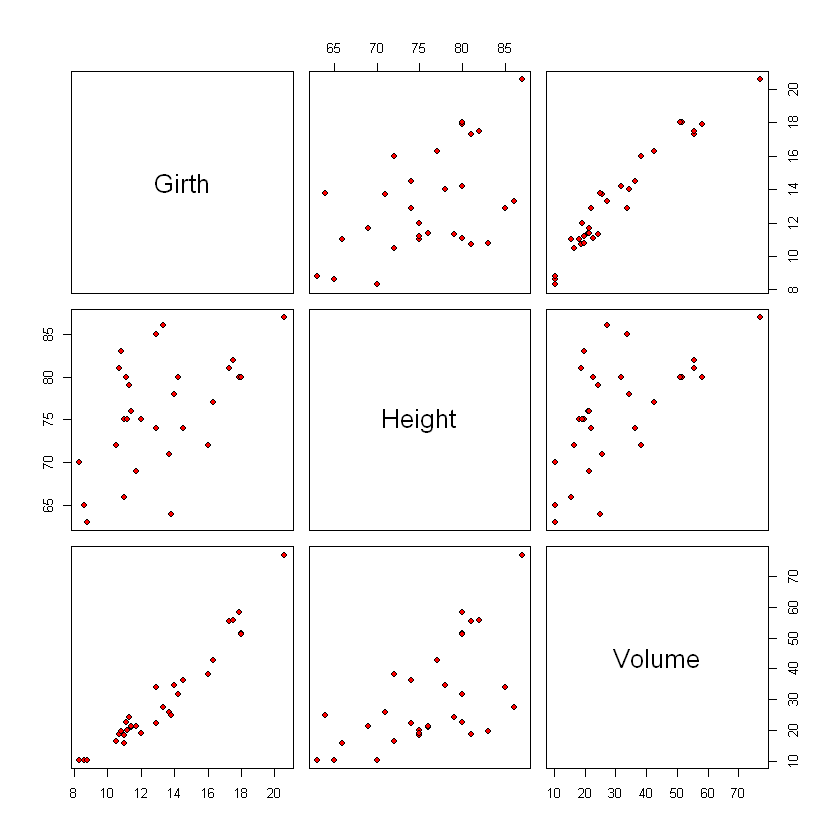

In [5]:
# pairwise distribution of the features
pairs(trees, pch = 21, bg = c("red"))

In [7]:
#par(cex=0.7, mai=c(0.1,0.1,0.2,0.1))
#ggboxplot(trees, y='Girth', main='Distribution of the girth measurements in trees dataset', width=0.1, orientation = "horizontal")
#gghistogram(trees, x = "Girth", bins = 9, add = "mean")
#ggecdf(trees, x = "Girth")

In [1]:
# Standard deviation and IQR are the two most common measures used to report the variability of the data
sapply(trees, sd)
quantile(trees$Girth)
IQR(trees$Girth)

Girth    Height    Volume 
 3.138139  6.371813 16.437846

0%   25%   50%   75%  100% 
 8.30 11.05 12.90 15.25 20.60

[1] 4.2

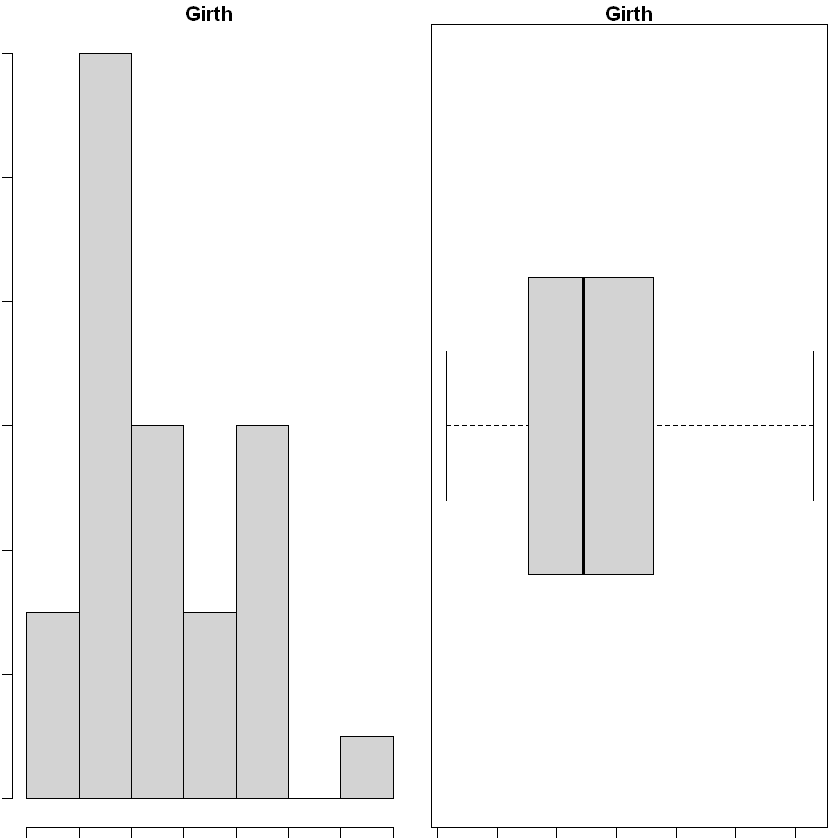

In [2]:
par(mfrow=c(1,2))
par(cex=0.7, mai=c(0.1,0.1,0.2,0.1))
layout(matrix(c(1,2), 2,2, byrow = TRUE), widths = c(2,2), heights = 0.5)
hist(trees$Girth, main='Girth')
boxplot(trees$Girth, main='Girth', horizontal = TRUE)